<h2> Import Statements </h2>

In [31]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from gplearn.genetic import SymbolicRegressor, SymbolicTransformer
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import validation_curve
from sklearn.metrics import mean_squared_error,r2_score, classification_report, max_error
import statsmodels.api as sm
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import statsmodels.formula.api as smf
import numpy as np
import math
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings ('ignore')
import seaborn as sns
#adjusted r2 formula

crossvalidation = KFold(n_splits=10, random_state=None, shuffle=False)
def calculate_adj_r2(r_sq, n, k):

    adj_r = 1-((1-r_sq)*(n-1)/(n-k-1))
   
    return adj_r

<h2> Reading Data from CSV </h2>

In [50]:
data=pd.read_csv("Foldspp.csv")
data.fillna(0)

,AT,V,AP,RH,PE
0,8.34,40.77,1010.84,90.01,480.48
1,23.64,58.49,1011.40,74.20,445.75
2,29.74,56.90,1007.15,41.91,438.76
3,19.07,49.69,1007.22,76.79,453.09
4,11.80,40.66,1017.13,97.20,464.43
...,...,...,...,...,...
9563,15.12,48.92,1011.80,72.93,462.59
9564,33.41,77.95,1010.30,59.72,432.90
9565,15.99,43.34,1014.20,78.66,465.96
9566,17.65,59.87,1018.58,94.65,450.93


In [28]:
data.head()

,AT,V,AP,RH,PE
0,8.34,40.77,1010.84,90.01,480.48
1,23.64,58.49,1011.40,74.20,445.75
2,29.74,56.90,1007.15,41.91,438.76
3,19.07,49.69,1007.22,76.79,453.09
4,11.80,40.66,1017.13,97.20,464.43


In [33]:
print(data.columns)
print(data.size)

Index(['AT', 'V', 'AP', 'RH', 'PE'], dtype='object')
47840


In [20]:

data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      9568 non-null   float64
 1   V       9568 non-null   float64
 2   AP      9568 non-null   float64
 3   RH      9568 non-null   float64
 4   PE      9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB


,AT,V,AP,RH,PE
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
std,7.452473,12.707893,5.938784,14.600269,17.066995
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.740000,1009.100000,63.327500,439.750000
50%,20.345000,52.080000,1012.940000,74.975000,451.550000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000


<h2> Exploratory Data Analysis </h2>

47840


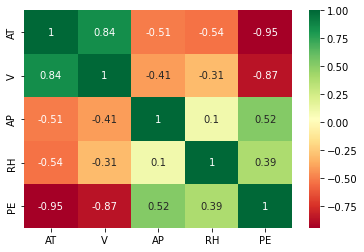

In [34]:

data.drop_duplicates()
print(data.size)
corr = data.corr()


X = [ 'AT', 'V', 'AP', 'RH' ]
Y = ['PE']
sns.heatmap(corr, cmap ='RdYlGn', annot = True)
plt.show() 


<h2> Data Plots </h2>

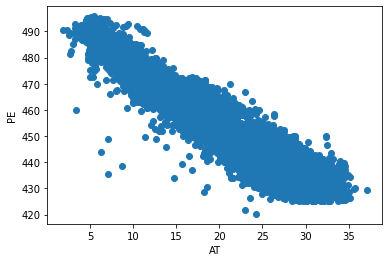

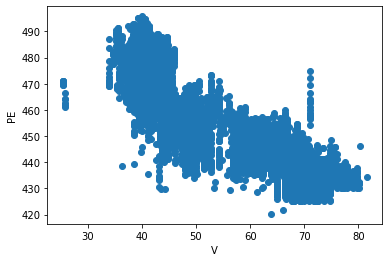

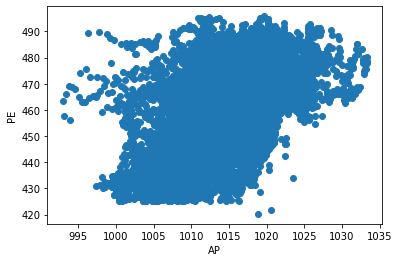

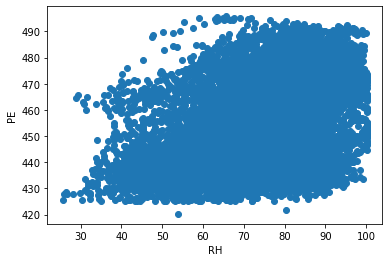

In [35]:

for i in X:
    plt.scatter(x=data[i], y=data[Y])
    plt.xlabel(i)
    plt.ylabel(Y[0])
    plt.show()
   

<h2> Data Imputation </h2>

Data for  AT


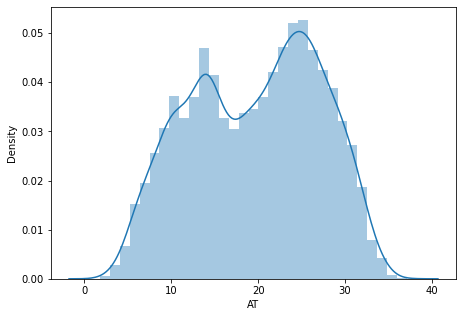

33.03309999999999 5.1167
Data for  V


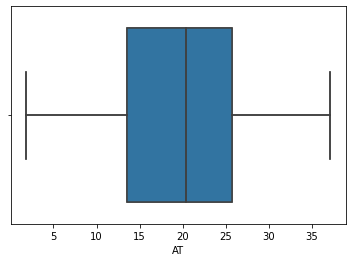

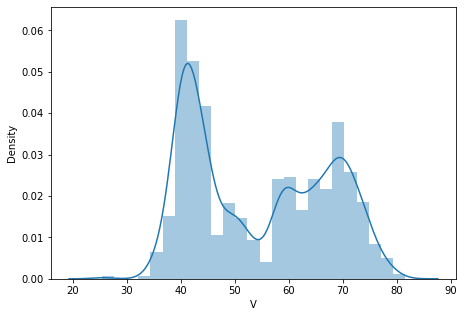

77.3 35.77
Data for  AP


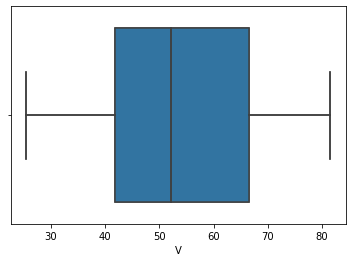

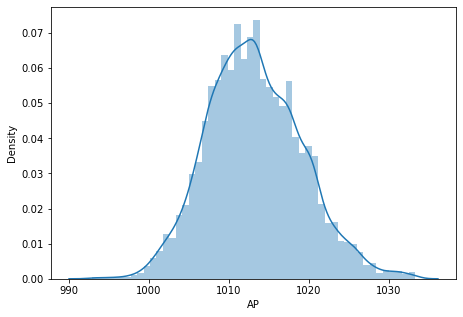

1028.2966 1000.68
Data for  RH


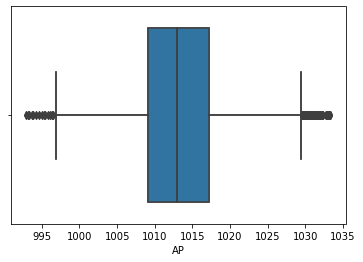

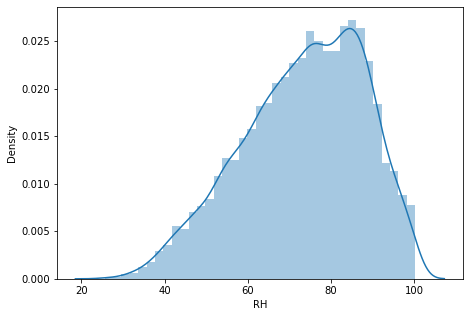

99.23649999999999 38.0835
Data for  PE


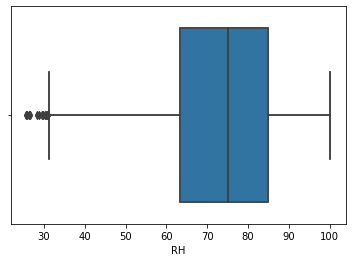

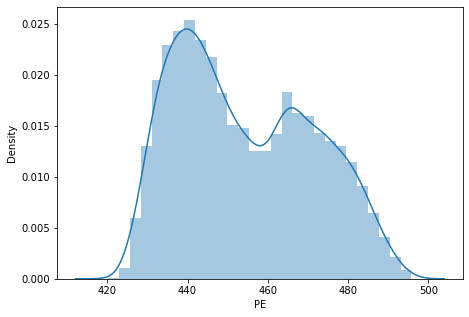

489.64 426.9234
                AT            V           AP           RH           PE
count  9568.000000  9568.000000  9568.000000  9568.000000  9568.000000
mean     19.651231    54.305804  1013.259078    73.308978   454.365009
std       7.452473    12.707893     5.938784    14.600269    17.066995
min       1.810000    25.360000   992.890000    25.560000   420.260000
25%      13.510000    41.740000  1009.100000    63.327500   439.750000
50%      20.345000    52.080000  1012.940000    74.975000   451.550000
75%      25.720000    66.540000  1017.260000    84.830000   468.430000
max      37.110000    81.560000  1033.300000   100.160000   495.760000


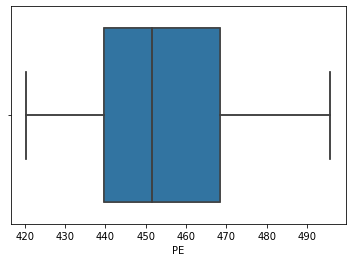

In [36]:
#  For Skewed distributions: Use Inter-Quartile Range (IQR) proximity rule.

# – The data points which fall below Q1 – 1.5 IQR or above Q3 + 1.5 IQR are outliers.

# where Q1 and Q3 are the 25th and 75th percentile of the dataset 
# respectively, and IQR represents the inter-quartile range and given by Q3 – Q1.
for i in X+Y:
    count=1
    print("Data for ", i)
    plt.figure(figsize=(16,5))
    plt.subplot(count,2,1)
    sns.distplot(data[i])
    plt.show()
    sns.boxplot(data[i])
    upper_limit = data[i].quantile(0.99)
    lower_limit = data[i].quantile(0.01)
    print(upper_limit, lower_limit)
    if i=='temp':
        data = data[(data[i] <= 100 ) & (data[i] > -100)]
    sns.boxplot(data[i])

    count=count+1
print(data.describe())



Data for  AT


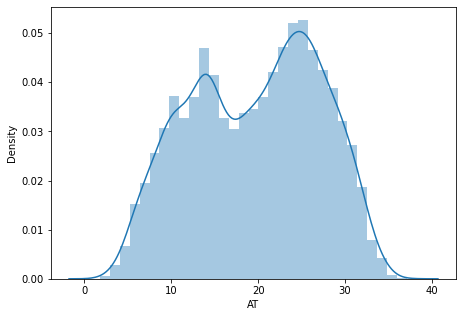

Data for  V


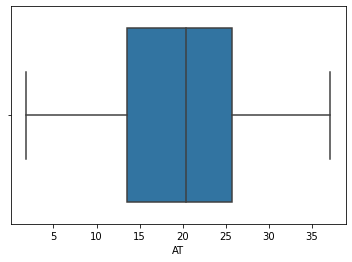

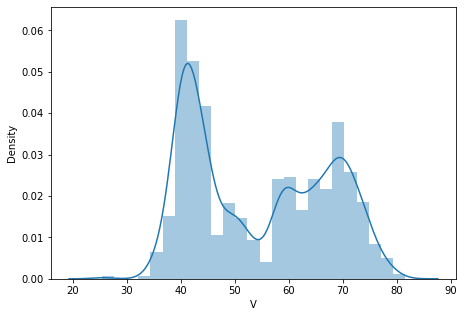

Data for  AP


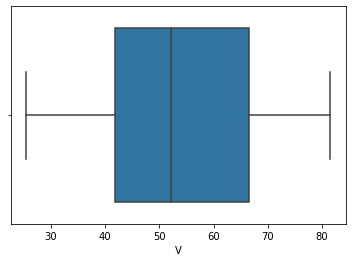

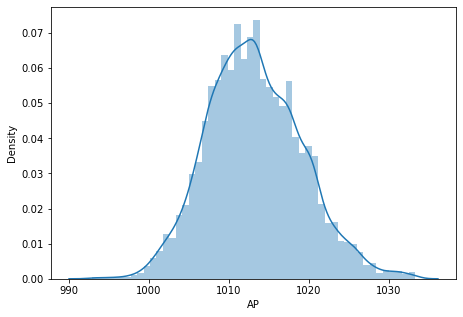

Data for  RH


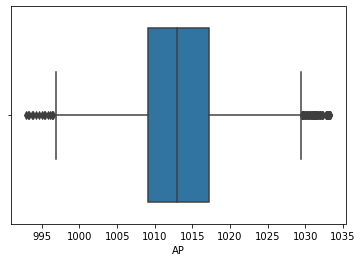

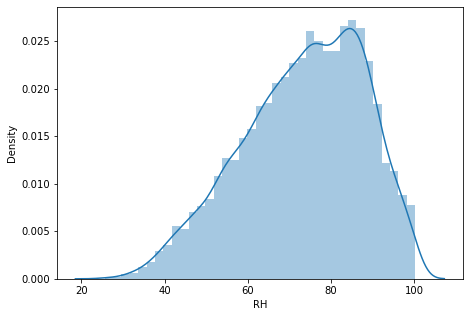

Data for  PE


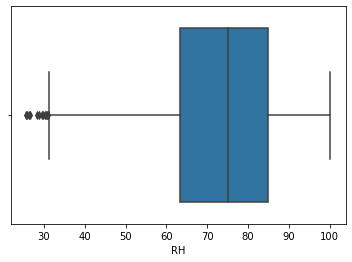

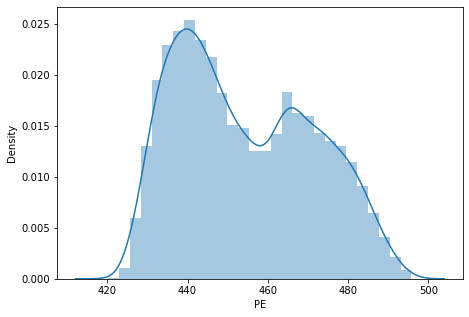

                AT            V           AP           RH           PE
count  9568.000000  9568.000000  9568.000000  9568.000000  9568.000000
mean     19.651231    54.305804  1013.259078    73.308978   454.365009
std       7.452473    12.707893     5.938784    14.600269    17.066995
min       1.810000    25.360000   992.890000    25.560000   420.260000
25%      13.510000    41.740000  1009.100000    63.327500   439.750000
50%      20.345000    52.080000  1012.940000    74.975000   451.550000
75%      25.720000    66.540000  1017.260000    84.830000   468.430000
max      37.110000    81.560000  1033.300000   100.160000   495.760000


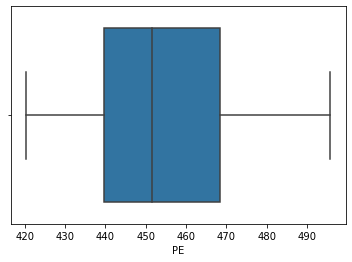

In [24]:
for i in X+Y:
    count=1
    print("Data for ", i)
    plt.figure(figsize=(16,5))
    plt.subplot(count,2,1)
    sns.distplot(data[i])
    plt.show()
    sns.boxplot(data[i])

    count=count+1
print(data.describe())


<h2> Dividing Data to Train and Test </h2>

In [18]:
X_train, X_test, Y_train, Y_test = train_test_split(data[X],data[Y], test_size=0.25, random_state=42, shuffle=True)
df_train=pd.concat([X_train, Y_train], axis=1).reindex(X_train.index)
df_test=pd.concat([X_test, Y_test], axis=1).reindex(X_test.index)
print(df_train.size)
print(df_test.size)

35880
11960


# Linear Regression

<h2> Forward Selection </h2>

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s finished

[2022-02-21 20:35:44] Features: 1/4 -- score: 0.8983677421327251[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


    feature_idx                                          cv_scores avg_score  \
1          (0,)  [0.8980486525931834, 0.8951979217294994, 0.896...  0.898368   
2        (0, 3)  [0.9203998796814248, 0.9146071759763906, 0.919...  0.920254   
3     (0, 1, 3)  [0.929029970238515, 0.9210190210639747, 0.9283...  0.927716   
4  (0, 1, 2, 3)  [0.9291226535527468, 0.9213151876520369, 0.928...   0.92799   

     feature_names  ci_bound   std_dev   std_err  
1            (AT,)   0.00339  0.002637  0.001319  
2         (AT, RH)  0.004615  0.003591  0.001795  
3      (AT, V, RH)  0.004988  0.003881   0.00194  
4  (AT, V, AP, RH)  0.005055  0.003933  0.001966  


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished

[2022-02-21 20:35:44] Features: 2/4 -- score: 0.9202544966264534[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished

[2022-02-21 20:35:44] Features: 3/4 -- score: 0.9277156422450121[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished

[2022-02-21 20:35:44] Features: 4/4 -- score: 0.9279901509689414

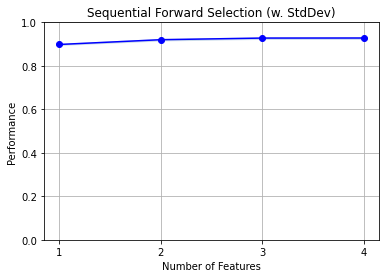

In [37]:
regr = LinearRegression()


#Forward Selection
sfs_f = SFS(regr, 
           k_features='best', 
           forward=True, 
           floating=False, 
           verbose=2,
           scoring='r2',
           cv=5)
sfs_f.fit(df_train[X], df_train[Y])
print(pd.DataFrame.from_dict(sfs_f.get_metric_dict()).T)
pd.DataFrame.from_dict(sfs_f.get_metric_dict()).T

fig1 = plot_sfs(sfs_f.get_metric_dict(), kind='std_dev')

plt.ylim([0, 1])
plt.title('Sequential Forward Selection (w. StdDev)')
plt.grid()
plt.show()


In [30]:
print('\nSequential Forward Selection best:')
print(sfs_f.k_feature_idx_)
print('CV Score:')
print(sfs_f.k_score_)
print(sfs_f.k_feature_names_)


Sequential Forward Selection best:
(0, 1, 2, 3)
CV Score:
0.9279901509689414
('AT', 'V', 'AP', 'RH')


<h2> Backward Selection </h2>

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s finished

[2022-02-21 20:35:48] Features: 3/1 -- score: 0.9277156422450121[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished

[2022-02-21 20:35:48] Features: 2/1 -- score: 0.9202544966264534[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished

[2022-02-21 20:35:48] Features: 1/1 -- score: 0.8983677421327251

    feature_idx                                          cv_scores avg_score  \
4  (0, 1, 2, 3)  [0.9291226535527468, 0.9213151876520369, 0.928...   0.92799   
3     (0, 1, 3)  [0.929029970238515, 0.9210190210639747, 0.9283...  0.927716   
2        (0, 3)  [0.9203998796814248, 0.9146071759763906, 0.919...  0.920254   
1          (0,)  [0.8980486525931834, 0.8951979217294994, 0.896...  0.898368   

     feature_names  ci_bound   std_dev   std_err  
4  (AT, V, AP, RH)  0.005055  0.003933  0.001966  
3      (AT, V, RH)  0.004988  0.003881   0.00194  
2         (AT, RH)  0.004615  0.003591  0.001795  
1            (AT,)   0.00339  0.002637  0.001319  


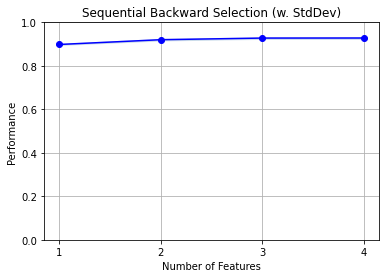

In [38]:
#BackWard Selection
sfs2 = SFS(regr, 
           k_features='best', 
           forward=False, 
           floating=False, 
           verbose=2,
           scoring='r2',
           cv=5)
sfs2.fit(df_train[X], df_train[Y])

print(pd.DataFrame.from_dict(sfs2.get_metric_dict()).T)
fig1 = plot_sfs(sfs2.get_metric_dict(), kind='std_dev')

plt.ylim([0, 1])
plt.title('Sequential Backward Selection (w. StdDev)')
plt.grid()
plt.show()


In [32]:
print('\nSequential Backward Selection best:')
print(sfs2.k_feature_idx_)
print('CV Score:')
print(sfs2.k_score_)


Sequential Backward Selection best:
(0, 1, 2, 3)
CV Score:
0.9279901509689414


# StepWise Selection


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s finished

[2022-02-20 17:58:45] Features: 1/4 -- score: 0.8983677421327251[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished

[2022-02-20 17:58:45] Features: 2/4 -- score: 0.9202544966264534[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs

    feature_idx                                          cv_scores avg_score  \
1          (0,)  [0.8980486525931834, 0.8951979217294994, 0.896...  0.898368   
2        (0, 3)  [0.9203998796814248, 0.9146071759763906, 0.919...  0.920254   
3     (0, 1, 3)  [0.929029970238515, 0.9210190210639747, 0.9283...  0.927716   
4  (0, 1, 2, 3)  [0.9291226535527468, 0.9213151876520369, 0.928...   0.92799   

     feature_names  ci_bound   std_dev   std_err  
1            (AT,)   0.00339  0.002637  0.001319  
2         (AT, RH)  0.004615  0.003591  0.001795  
3      (AT, V, RH)  0.004988  0.003881   0.00194  
4  (AT, V, AP, RH)  0.005055  0.003933  0.001966  


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished

[2022-02-20 17:58:45] Features: 3/4 -- score: 0.9277156422450121[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished

[2022-02-20 17:58:45] Features: 4/4 -- score: 0.9279901509689414

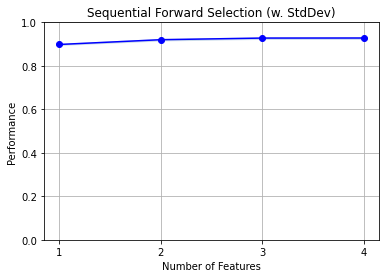

In [33]:
#StepWise Selection
sfs_s = SFS(regr, 
           k_features='best', 
           forward=True, 
           floating=True, 
           verbose=2,
           scoring='r2',
           cv=5)
sfs_s.fit(df_train[X], df_train[Y])

print(pd.DataFrame.from_dict(sfs_s.get_metric_dict()).T)
fig1 = plot_sfs(sfs_s.get_metric_dict(), kind='std_dev')

plt.ylim([0, 1])
plt.title('Sequential Forward Selection (w. StdDev)')
plt.grid()
plt.show()

In [34]:
sfs2.subsets_
print('\nSequential step wise Selection best:')
print(sfs2.k_feature_idx_)
print('CV Score:')
print(sfs2.k_score_)


Sequential step wise Selection best:
(0, 1, 2, 3)
CV Score:
0.9279901509689414


# Linear Regression


In [39]:
linear_regr = LinearRegression().fit(X_train, Y_train)

Y_Pred= linear_regr.predict(X_test)


x=r2_score(Y_test, Y_Pred)
print("R2",x)
adjusted_r2 = calculate_adj_r2(x, X_test.count()[0],len(X))
print("Adj R2",adjusted_r2)


scores = cross_val_score(linear_regr, X_train, Y_train , scoring="r2", cv=crossvalidation,
 n_jobs=1)

print("Folds: " + str(len(scores)) + ", MSE: " + str(np.mean(np.abs(scores))) + ", STD: " + str(np.std(scores)))


R2 0.9303315024744818
Adj R2 0.9302147559348496
Folds: 10, MSE: 0.9279112573958471, STD: 0.005657736789581684


# Ridge CV To get Best Alpha

Best Alpha 0.1
R2 0.9303315032356659
Adj R2 0.9302147566973092
[0.93050794 0.93050794 0.93050794 0.93050794 0.93050794 0.93050794
 0.93050794 0.93050794 0.93050794 0.93050794 0.93050794 0.93050794
 0.93050794 0.93050794 0.93050794 0.93050794 0.93050794 0.93050794
 0.93050794 0.93050794 0.93050794 0.93050794 0.93050794 0.93050794
 0.93050794 0.93050794 0.93050794 0.93050794 0.93050794 0.93050794
 0.93050794 0.93050794 0.93050794 0.93050794 0.93050794 0.93050794
 0.93050794 0.93050794 0.93050794 0.93050794 0.93050794 0.93050794
 0.93050794 0.93050794 0.93050794 0.93050794 0.93050794 0.93050794
 0.93050794 0.93050794 0.93050794 0.93050794 0.93050794 0.93050794
 0.93050794 0.93050794 0.93050794 0.93050794 0.93050794 0.93050794
 0.93050794 0.93050794 0.93050794 0.93050794 0.93050794 0.93050794
 0.93050794 0.93050794 0.93050794 0.93050794 0.93050794 0.93050794
 0.93050794 0.93050794 0.93050794 0.93050794 0.93050794 0.93050794
 0.93050794 0.93050794 0.93050794 0.93050794 0.93050794 0.93050794

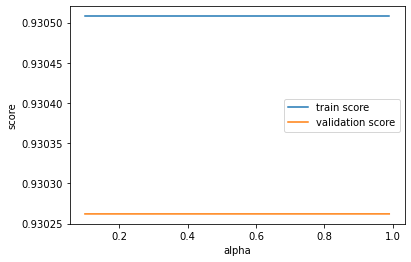

In [40]:

#define model
model_cv = RidgeCV(alphas=np.arange(.1, 1,0.01), cv=5, scoring='neg_mean_absolute_error')

#fit model
model_cv.fit(X_train, Y_train)

#display lambda that produced the lowest test MSE
print("Best Alpha", model_cv.alpha_)

Y_Pred=model_cv.predict(X_test)

x=r2_score(Y_test, Y_Pred)
print("R2",x)
adjusted_r2 = calculate_adj_r2(x, X_test.count()[0],len(X))
print("Adj R2",adjusted_r2)
# scores = cross_val_score(model_cv, X_train, Y_train , scoring="r2", cv=crossvalidation,
#  n_jobs=1)

# print("Folds: " + str(len(scores)) + ", MSE: " + str(np.mean(np.abs(scores))) + ", STD: " + str(np.std(scores)))

train_scores, valid_scores = validation_curve(
 Ridge(), X_test, Y_test, param_name="alpha", param_range=np.arange(.1, 1,0.01),
 cv=5)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
valid_scores_mean = np.mean(valid_scores, axis=1)
valid_scores_std = np.std(valid_scores, axis=1)
print(train_scores_mean)
plt.xlabel('alpha')
plt.ylabel('score')
plt.plot(np.arange(.1, 1,0.01), train_scores_mean, label="train score")
plt.plot(np.arange(.1, 1,0.01), valid_scores_mean, label="validation score")
plt.legend()
plt.show()


R2 0.9303315100636426
Adj R2 0.9302147635367278
[0.92816041 0.92816041 0.92816041 0.92816041 0.92816041 0.92816041
 0.92816041 0.92816041 0.92816041 0.92816041 0.92816041 0.92816041
 0.92816041 0.92816041 0.92816041 0.92816041 0.92816041 0.92816041
 0.92816041 0.92816041 0.92816041 0.92816041 0.92816041 0.92816041
 0.92816041 0.92816041 0.92816041 0.92816041 0.92816041 0.92816041
 0.92816041 0.92816041 0.92816041 0.92816041 0.92816041 0.92816041
 0.92816041 0.92816041 0.92816041 0.92816041 0.92816041 0.92816041
 0.92816041 0.92816041 0.92816041 0.92816041 0.92816041 0.92816041
 0.92816041 0.92816041 0.92816041 0.92816041 0.92816041 0.92816041
 0.92816041 0.92816041 0.92816041 0.92816041 0.92816041 0.92816041
 0.92816041 0.92816041 0.92816041 0.92816041 0.92816041 0.92816041
 0.92816041 0.92816041 0.92816041 0.92816041 0.92816041 0.92816041
 0.92816041 0.92816041 0.92816041 0.92816041 0.92816041 0.92816041
 0.92816041 0.92816041 0.92816041 0.92816041 0.92816041 0.92816041
 0.92816041 0.

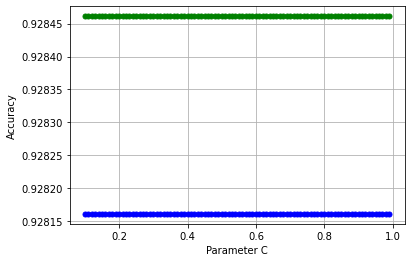

In [37]:
model = Ridge()
model.fit(X_train, Y_train)
Y_Pred=model.predict(X_test)

x=r2_score(Y_test, Y_Pred)
print("R2",x)
adjusted_r2 = calculate_adj_r2(x, X_test.count()[0],len(X))
print("Adj R2",adjusted_r2)

train_scores, _ = validation_curve(model,
                                             X=X_train, y=Y_train,
                                             cv=5, param_name="alpha", param_range=np.arange(.1, 1,0.01),)
#
# Find the mean of training and test scores out of 10-fod StratifiedKFold cross validation run as part fo execution of validation curve
#

_, test_scores = validation_curve(model,
                                             X=data[X], y=data[Y],
                                             cv=5, param_name="alpha", param_range=np.arange(.1, 1,0.01),)
train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
print(train_mean)
plt.plot(np.arange(.1, 1,0.01), train_mean,
         marker='o', markersize=5,
         color='blue', label='Training Accuracy')
plt.plot(np.arange(.1, 1,0.01), test_mean,
         marker='o', markersize=5,
         color='green', label='Validation Accuracy')
plt.xlabel('Parameter C')
plt.ylabel('Accuracy')
plt.grid()
plt.show()

# Symbolic Regression

In [41]:
est_gp = SymbolicRegressor(population_size=5000,
                           generations=10, stopping_criteria=0.01,
                           p_crossover=0.7, p_subtree_mutation=0.1,
                           p_hoist_mutation=0.05, p_point_mutation=0.1,
                           max_samples=0.9, verbose=1,
                           parsimony_coefficient=0.01, random_state=0)
est_gp.fit(X_train, Y_train)
score_gp = est_gp.score(X_train, Y_train)
print(score_gp)
Y_Pred=est_gp.predict(X_test)
x=r2_score(Y_test, Y_Pred)
print("R2",x)
adjusted_r2 = calculate_adj_r2(x, X_test.count()[0],len(X))
print("Adj R2",adjusted_r2)

    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0    31.03      3.98178e+28        3          17.3245          17.2795     52.40s
   1    16.24      2.78798e+12       17          6.42056          6.47186     43.69s
   2    19.61      2.02208e+12       17          6.40305          6.62933     44.59s
   3    11.81      8.09009e+14       25           6.0778          6.22479     30.02s
   4    10.42      6.55116e+11        9          5.46902          5.75868     26.32s
   5    16.01      7.55942e+07       17          4.98454          4.87764     23.81s
   6    17.92      3.67218e+07       17          4.95039          5.18482     18.96s
   7    15.51      1.93213e+08       21            4.882          4.86592     13.74s
   8    12.48      6.71757e+24       21          4.87054          4.96897  

# Lasso Regression

In [20]:
lasso_model = Lasso()
lasso_model.fit(X_train, Y_train)
Y_Pred=lasso_model.predict(X_test)

x=r2_score(Y_test, Y_Pred)
print("R2",x)
adjusted_r2 = calculate_adj_r2(x, X_test.count()[0],len(X))
print("Adj R2",adjusted_r2)


R2 0.9300582893533962
Adj R2 0.9299410849786218


# Lasso Regression

In [42]:
from sklearn.linear_model import LassoCV

# Lasso with 5 fold cross-validation
model_l_cv = LassoCV(cv=5, random_state=0, max_iter=10000)

# Fit model
model_l_cv.fit(X_train, Y_train)
print(model_l_cv.alpha_)
lasso_best = Lasso(alpha=model_l_cv.alpha_)
lasso_best.fit(X_train, Y_train)
Y_Pred=lasso_best.predict(X_test)

x=r2_score(Y_test, Y_Pred)
print("R2",x)
adjusted_r2 = calculate_adj_r2(x, X_test.count()[0],len(X))
print("Adj R2",adjusted_r2)


0.18892552527747175
R2 0.9303156097596659
Adj R2 0.9301988365879184


# Quadratic Regression

In [43]:
 
poly = PolynomialFeatures(degree = 2)
X_poly = poly.fit_transform(X_train)
 
poly.fit(X_poly, Y_train)
lin2 = LinearRegression()
lin2.fit(X_poly, Y_train)
Y_Pred= lin2.predict(poly.fit_transform(X_test))
x=r2_score(Y_test, Y_Pred)
print("R2",x)
adjusted_r2 = calculate_adj_r2(x, X_test.count()[0],len(X))
print("Adj R2",adjusted_r2)
print(max_error(Y_test, Y_Pred))


R2 0.9388469766372023
Adj R2 0.9387444998489949
33.37268761955659


# Symbolic Ridge Regression 

In [44]:
#Symbolic Ridge Regression 
est = Ridge()
est.fit(data[X][:5000],data[Y][:5000])
print(est.score(data[X][5000:],data[Y][5000:]))


0.930954704556895


In [84]:
print(data.size)

47840


In [45]:
function_set = ['add', 'sub', 'mul', 'div',
                'sqrt', 'log', 'abs', 'neg', 'inv',
                'max', 'min']
gp = SymbolicTransformer(generations=20, population_size=2000,
                         hall_of_fame=100, n_components=10,
                         function_set=function_set,
                         parsimony_coefficient=0.0005,
                         max_samples=0.9, verbose=1,
                         random_state=0, n_jobs=3)
gp.fit(data[X][:5000],data[Y][:5000])

    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0    13.74         0.587065       20         0.959594         0.965298     58.97s
   1     8.57         0.822174       20         0.960623         0.955686     28.28s
   2     7.09         0.870393       21         0.961018         0.952385     23.64s
   3     9.23         0.852342       16         0.962606         0.966329     25.80s
   4     7.31         0.854318       13         0.964322         0.959531     20.35s
   5     6.63           0.8706       10         0.965491         0.951208     17.83s
   6     6.24         0.906036       11         0.965204         0.954984     16.25s
   7     6.66         0.904324       11         0.965272         0.957375     15.75s
   8     8.09         0.866357       10         0.966417         0.942926  

SymbolicTransformer(function_set=['add', 'sub', 'mul', 'div', 'sqrt', 'log',
                                  'abs', 'neg', 'inv', 'max', 'min'],
                    max_samples=0.9, n_jobs=3, parsimony_coefficient=0.0005,
                    population_size=2000, random_state=0, verbose=1)

In [9]:
35880
11960
print(len(data[Y]))
print(len(data[Y][4000:]))
gp_features = gp.transform(data[X])
new_data = np.hstack((data[X], gp_features))


9568
5568


In [46]:
est = Ridge()
est.fit(new_data[:5000],data[Y][:5000])
print(est.score(new_data[5000:],data[Y][5000:]))
Y_Pred= est.predict(new_data[5000:])

x=r2_score(data[Y][5000:], Y_Pred)
print("R2",x)
adjusted_r2 = calculate_adj_r2(x, len(new_data[5000:]),len(X))
print("Adj R2",adjusted_r2)
print(max_error(data[Y][5000:], Y_Pred))


0.9363257970916933
R2 0.9363257970916933
Adj R2 0.9362699792500029
32.85399059267593


# Symbolic Lasso Regression 

In [47]:
function_set = ['add', 'sub', 'mul', 'div',
                'sqrt', 'log', 'abs', 'neg', 'inv',
                'max', 'min']
gp = SymbolicTransformer(generations=20, population_size=2000,
                         hall_of_fame=100, n_components=10,
                         function_set=function_set,
                         parsimony_coefficient=0.0005,
                         max_samples=0.9, verbose=1,
                         random_state=0, n_jobs=3)
gp.fit(data[X][:5000],data[Y][:5000])

    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0    13.74         0.587065       20         0.959594         0.965298     17.74s
   1     8.57         0.822174       20         0.960623         0.955686     19.34s
   2     7.09         0.870393       21         0.961018         0.952385     18.65s
   3     9.23         0.852342       16         0.962606         0.966329     20.68s
   4     7.31         0.854318       13         0.964322         0.959531     16.12s
   5     6.63           0.8706       10         0.965491         0.951208     14.67s
   6     6.24         0.906036       11         0.965204         0.954984     13.65s
   7     6.66         0.904324       11         0.965272         0.957375     12.55s
   8     8.09         0.866357       10         0.966417         0.942926  

SymbolicTransformer(function_set=['add', 'sub', 'mul', 'div', 'sqrt', 'log',
                                  'abs', 'neg', 'inv', 'max', 'min'],
                    max_samples=0.9, n_jobs=3, parsimony_coefficient=0.0005,
                    population_size=2000, random_state=0, verbose=1)

In [48]:
gp_features = gp.transform(data[X])
new_data = np.hstack((data[X], gp_features))

In [49]:
#Symbolic Lasso Regression 
sym_lasso = Lasso()
sym_lasso.fit(new_data[:5000],data[Y][:5000])

print(sym_lasso.score(new_data[5000:],data[Y][5000:]))
Y_Pred= sym_lasso.predict(new_data[5000:])

x=r2_score(data[Y][5000:], Y_Pred)
print("R2",x)
adjusted_r2 = calculate_adj_r2(x, len(new_data[5000:]),len(X))
print("Adj R2",adjusted_r2)
print(max_error(data[Y][5000:], Y_Pred))

0.9304983804926836
R2 0.9304983804926836
Adj R2 0.9304374542428416
30.59049667767397
